# Heart Disease Classification - Cleveland

Dataset: UCI Heart Disease dataset available at the UCI Machine Learning data repository - http://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Goal
- Given clinical parameters about a patient in a primary care setting, predict if a patient has heart disease or not


### Features in Dataset
- There are 13 features in the original Cleveland dataset
1. `age`: Age of the patient in years
2. `sex`: 1 = Male, 0 = Female
3. `cp`: chest pain type, 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
4. `trestbps`: resting blood pressure in mmHg on admission to the hospital
5. `chol`: serum cholesterol in mg/dl
6. `fbs`: if fasting blood sugar > 120 mg/dl, 1 = true, 0 = false
7. `restecg`: resting electrocardiographic results, 0 = normal, 1 = having ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise-induced angina, 1 = yes, 0 = no
10. `oldpeak`: ST depression induced by exercise relative to rest
11. `slope`: the slope of the peak exercise ST segment, 1 = upsloping, 2 = flat, 3 = downsloping
12. `ca`: number of major vessels (0-3) colored by fluoroscopy
13. `thal`: thalassemia/defect type, 3 = normal, 6 = fixed defect, 7 = reversible defect

We decided to exlcude the variable `ca` from our application (see report). These are the features according to data type:


- Categorical features: `sex`, `cp`, `restecg`, `slope`, `thal`
- Binary features: `exang`, `fbs`
- Numerical features: `age`, `trestbps`, `chol`, `thalach`, `oldpeak`


### Class Label
- The predicted class label is `num`that we will replace it with the name `target`
- The "goal" of the application refers to the presence of heart disease in the patient. It is valued from 0 (no presence of Health disease) to 1,2,3 4 (presence of Heart disease). We decided to create a binary classification model 0, no presence of Heart disease,  and 1 (will include 1,2,3,4 values) presence of Heart disease. 

### Data preprocessing
- There are 303 records in this dataset
- Visual inspection of the dataframe shows there are 2 missing values, marked as '?'. These are in `thal` columns
- Firstly we will handle with the missing values 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("processed.cleveland.csv")
df.drop("ca", axis=1, inplace=True)
df.rename(columns={"num": "target"}, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,3.0,1


In [3]:
# Replace all '?' in the data with null values 
df = df.replace("?", np.nan)

In [4]:
# There are 2 null values in thal
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        2
target      0
dtype: int64

In [5]:
# Fill null values in thal with most common values 
df["thal"].fillna(df["thal"].mode()[0], inplace = True)

In [6]:
# Change target labels to 1 and 0 to create a binary classification problem
df["target"] = df["target"].replace([2, 3, 4], 1)

In [7]:
# Variable types
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
thal         object
target        int64
dtype: object

#### The variables types are

1. Binary: `fbs`, `exang` , `num`
2. Categorical: `cp`, `restecg`, `slope`, `thal`, `sex`
3. Continuous: `age`, `trestbps`,`chol` , `thalac`, `oldpeak`

In [8]:
# Change to appropriate datatype. Do we have to do that?? 
df.cp = df.cp.astype("category")
df.restecg = df.restecg.astype("category")
df.slope = df.slope.astype("category")
df.thal = df.thal.astype("category")
df.sex = df.sex.astype("category")
df.fbs = df.fbs.astype("bool")
df.exang = df.exang.astype("bool")
df.target = df.target.astype("bool")
df.dtypes

age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs             bool
restecg     category
thalach      float64
exang           bool
oldpeak      float64
slope       category
thal        category
target          bool
dtype: object

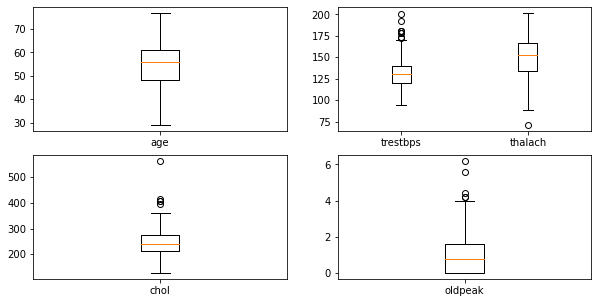

In [9]:
# Check numeric variables for outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))
ax1.boxplot(df['age'], labels=['age']);
ax2.boxplot([df['trestbps'], df['thalach']], labels=['trestbps', 'thalach']);
ax3.boxplot(df['chol'], labels=['chol']);
ax4.boxplot(df['oldpeak'], labels=['oldpeak']);

- There are some outliers for `trestbps`, `thalach`, `chol` and `oldpeak`
- Verified with medical doctor - values are plausible hence these values are kept in the dataset

In [10]:
# Check class balance - 164 patients have label False ( 0, no heart disease), 139 patients have label True ( 1, heart disease)
df["target"].value_counts()

False    164
True     139
Name: target, dtype: int64

<AxesSubplot:>

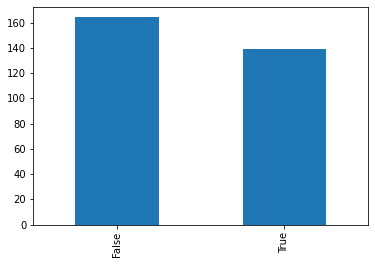

In [11]:
# Plot class balance
df["target"].value_counts().plot.bar()

### Preparing dataframes for Classification Tasks

This step is to **transform the pandas DataFrame into numerical Numpy arrays**, so that they can be processed by the packages in `sklearn`. At this stage, we need to **encode the categorical features** .

### One-hot encoding

In [12]:
# Perform one-hot encoding for categorical variables
df_processed = pd.get_dummies(df, columns=["sex","cp","restecg","slope","thal"])

In [13]:
df_processed 

,age,trestbps,chol,fbs,thalach,exang,oldpeak,target,sex_0.0,sex_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,True,150.0,False,2.3,False,0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,160.0,286.0,False,108.0,True,1.5,True,0,1,...,1,0,0,1,0,1,0,1,0,0
2,67.0,120.0,229.0,False,129.0,True,2.6,True,0,1,...,1,0,0,1,0,1,0,0,0,1
3,37.0,130.0,250.0,False,187.0,False,3.5,False,0,1,...,0,1,0,0,0,0,1,1,0,0
4,41.0,130.0,204.0,False,172.0,False,1.4,False,1,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,False,132.0,False,1.2,True,0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,144.0,193.0,True,141.0,False,3.4,True,0,1,...,1,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,False,115.0,True,1.2,True,0,1,...,1,1,0,0,0,1,0,0,0,1
301,57.0,130.0,236.0,False,174.0,False,0.0,True,1,0,...,0,0,0,1,0,1,0,1,0,0


In [14]:
# Convert to numeric the columns that are binary
df_processed["fbs"] = df_processed["fbs"].astype(int)
df_processed["exang"] = df_processed["exang"].astype(int)
df_processed["target"] = df_processed["target"].astype(int)


### Choose features 

### Correlation Matrix with Heatmap

Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable. The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable) Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

<AxesSubplot:>

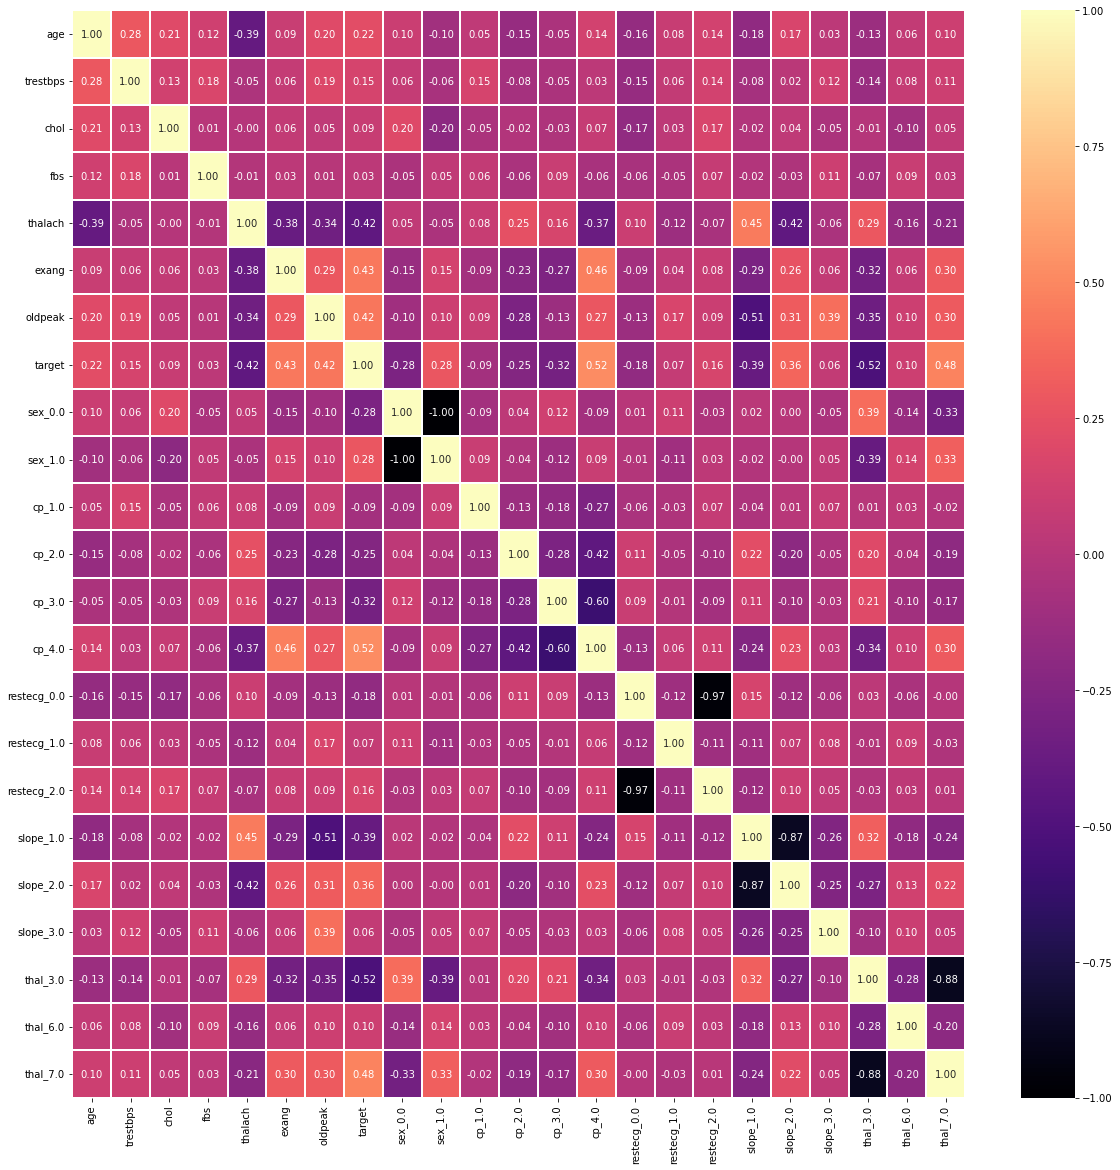

In [15]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df_processed.corr(),annot=True,cmap="magma",fmt=".2f", linewidths=.10)

- From the correlation matrix it seems that the `exang`, `oldpeak`, `sex`, `age`, `thal_7`, `slope_2`and `cp_4` are more correlated with the `target `(the presense of heart disease or not) 
- `exang`: Exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
- `thal_7`:  7 = reversable defect
- `slope_2`:the slope of the peak exercise ST segment — 2: upsloping
- `cp_4`:chest pain type - 4: typical angina
- `sex`, 
- `age`

### Baseline modelling
- We have refered to the flowchart that is provided in the following site that gave us a rough guide on how to approach problems with regard to which estimators to try on our data. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- Models that we have used are the followings : SVC, KNN, DT, RF

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier;
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.random.seed(42)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [17]:
# Defining feature vector and class labels
X = df_processed.drop("target", axis=1)
y = df_processed["target"]

In [18]:
# Finally, we need transform from Pandas DataFrame to numerical Arrays, and store the column names
data_X = X.values
data_y = y.values

data_colnames = X.columns.values
print(data_colnames)

['age' 'trestbps' 'chol' 'fbs' 'thalach' 'exang' 'oldpeak' 'sex_0.0'
 'sex_1.0' 'cp_1.0' 'cp_2.0' 'cp_3.0' 'cp_4.0' 'restecg_0.0' 'restecg_1.0'
 'restecg_2.0' 'slope_1.0' 'slope_2.0' 'slope_3.0' 'thal_3.0' 'thal_6.0'
 'thal_7.0']


In [19]:
# Normalisation of feature vector since SVC and KNN require normalisation
scaler = MinMaxScaler()
data_X = scaler.fit_transform(data_X)

### Final feature matrix $\mathbf{X}$

In [20]:
data_X

array([[0.70833333, 0.48113208, 0.24429224, ..., 0.        , 1.        ,
        0.        ],
       [0.79166667, 0.62264151, 0.3652968 , ..., 1.        , 0.        ,
        0.        ],
       [0.79166667, 0.24528302, 0.23515982, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.58333333, 0.33962264, 0.01141553, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 0.33962264, 0.25114155, ..., 1.        , 0.        ,
        0.        ],
       [0.1875    , 0.41509434, 0.11187215, ..., 1.        , 0.        ,
        0.        ]])

### Final target array $\mathbf{y}$

In [21]:
data_y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

## Cross Validation
As the single train-test split has a significant problem. There is a fraction of the dataset that is holdout for testing and never goes in the training process.
Cross-validation (CV) is a strategy to solve the problem of single train-test split and **the correct approach** to evaluate models performance. The CV partitions a dataset into `k` folds or groups. Then, each fold is part of the test set once. It means that a CV creates `k` different classification models instead of only one, and note that it might be very time consuming for classifiers that take a lot of time training or very large datasets.

In [22]:
from sklearn.model_selection import cross_validate

## Model evaluation with CV

In [23]:
# Collate models, metrics and evaluation statistics
models = {
    "Logistic Regression": LogisticRegression(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "GBDT": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()}


metrics = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

result_eval = pd.DataFrame({ "classifier_name":[],
                                    "fit_time": [],
                                    "score_time": [],
                                    "test_accuracy": [],
                                    "test_precision_macro": [],
                                    "test_recall_macro": [],
                                    "test_f1_macro": []})

In [24]:
# Testing and evaluating models 
for name, classifier in models.items():
    
    np.random.seed(42)
        
    scores_cv = cross_validate(classifier, data_X, data_y, cv=5, scoring=metrics)

    dict_this_result = {"classifier_name":[name],}
    
    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [scores_cv[metric_name].mean()]

    this_result = pd.DataFrame(dict_this_result)
    result_eval = pd.concat([result_eval, this_result], ignore_index=True)

In [25]:
result_eval

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,Logistic Regression,0.007120,0.002255,0.808525,0.811927,0.806200,0.806261
1,DT,0.000903,0.001908,0.702842,0.705185,0.699779,0.698692
2,RF,0.098867,0.009742,0.775301,0.778637,0.769114,0.769629
3,GBDT,0.060981,0.002084,0.788525,0.797199,0.784300,0.783055
4,AdaBoost,0.053631,0.007512,0.785027,0.786032,0.781886,0.781412
5,KNN,0.000361,0.003822,0.795246,0.795835,0.795960,0.794272
6,SVC,0.002138,0.002754,0.795191,0.796963,0.792448,0.792821


From the testing and the evaluation of the different classifier that we chose, one can see `Logistic Regression`, `KNN` and `SVC`perform best, followed by `GBDT`, `AdaBoost`, then `Random Forest` and finally `Decision Tree`. 

### Support Vector Classification.

SVC has various hyperparameters. The most important are `C` and the `kernel` (se report). I will use the following codes to find which compbination of hyperparameters `C` and `kernel` is the best. 

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
svc= SVC()
parameters = {
    "kernel": ["linear","rbf"],
    "C":[0.1,1,10]
}

In [28]:
cv = GridSearchCV(svc,parameters,cv=5)
cv.fit(data_X,data_y) 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [29]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,2)} + or -{round(std,2)} for the {params}')

In [30]:
display(cv)

Best parameters are: {'C': 0.1, 'kernel': 'linear'}
0.81 + or -0.03 for the {'C': 0.1, 'kernel': 'linear'}
0.81 + or -0.04 for the {'C': 0.1, 'kernel': 'rbf'}
0.79 + or -0.05 for the {'C': 1, 'kernel': 'linear'}
0.8 + or -0.04 for the {'C': 1, 'kernel': 'rbf'}
0.78 + or -0.06 for the {'C': 10, 'kernel': 'linear'}
0.76 + or -0.04 for the {'C': 10, 'kernel': 'rbf'}


From the previous analysis it seems that the cobmination of `C` and `kernel`that has the best performance is `C`= 0.1 and `kernel`= linear. I will try the second best combination `C`=0.1 and `kernel`= rbf in order to see the results of the evaluation. 

In [31]:
MODELS_TO_TEST = {
    "SVM_lin": SVC(kernel='linear', C= 0.1),
    "SVM_rbf": SVC(kernel='rbf', C=0.1),
}

# Define the number of splits 
NUMBER_OF_SPLITS = 5

# Scoring metrics
SCORING_METRICS = ["accuracy", "precision_macro", "recall_macro", "f1_macro"] # Metrics of interest

# Create empty DataFrame to populate  the name of the classifier and the six values returned from `cross_validate()`
results_evaluation = pd.DataFrame({
                                    "classifier_name":[],
                                    "fit_time": [],
                                    "score_time": [],
                                    "test_accuracy": [],
                                    "test_precision_macro": [],
                                    "test_recall_macro": [],
                                    "test_f1_macro": [],
                                    })

In [32]:
#### ITERATION FOR THE EXPERIMENT

for name, classifier in MODELS_TO_TEST.items():
    
    print(f"Currently training the classifier {name}.")

    # Get the evaluation metrics per fold after cross-validation
    # Note that we are passing the normalized array `X` to all classifiers
    scores_cv = cross_validate(classifier, data_X, data_y, cv=NUMBER_OF_SPLITS, scoring=SCORING_METRICS)

    # Average the scores among folds
    dict_this_result = {
                    "classifier_name":[name],
                    }
    # Populate the dictionary with the results of the cross-validation
    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [ scores_cv[metric_name].mean() ]

    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame(dict_this_result)

    # Append to the main dataframe with the results 
    results_evaluation = pd.concat([results_evaluation, this_result], ignore_index=True)

print("The experimental setup has finished")

Currently training the classifier SVM_lin.
Currently training the classifier SVM_rbf.
The experimental setup has finished


In [33]:
results_evaluation

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,SVM_lin,0.001905,0.002718,0.808470,0.810304,0.805804,0.805954
1,SVM_rbf,0.002735,0.003217,0.808361,0.813210,0.803375,0.804172


### Conclusion of SVM classification 

The results show what we expected that the linear SVC has the best results
- **F1** : 0.805954
- **Recall**: 0.805804
- **Precision**: 0.810304
- **Accuracy** : 0.808470	

### KNN classification: Identifying the best parameters

In [34]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)
g_res = gs.fit(data_X, data_y)
g_res.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.8150819672131148

In [35]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

KNN results:
* fit_time = 0.000000
* score_time = 0.003124	
* Accuracy = 0.815082	
* Precision = 0.818510
* Recall = 0.812946	
* F1 = 0.812618

Hyperparameters: n_neighbors = 15, weights = 'uniform', algorithm = 'brute', metric = 'manhattan'

### Random forest

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
# Check range of best parameters with randomized search CV
# This code takes a while to run so I've commented it out

"""
np.random.seed(42)

# Randomized parameters grid 
rf_rs_params = {"n_estimators" : np.arange(100, 1000, 50),
                "max_depth": [None, 10, 20, 30],
                "max_features": ['auto', 'sqrt'],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2)}

# Instantiate RandomizedSearchCV
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                    param_distributions=rf_rs_params,
                    cv=5,
                    n_iter=20,
                    verbose=1)

# Fit to data
rs_rf.fit(data_X, data_y)
"""

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=1)

In [38]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 900,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 20}

In [39]:
rs_rf.best_score_

0.8018579234972677

In [40]:
# Use grid search to find best parameters within smaller range of hyperparameters 
# This code takes a while to run so I've commented it out

"""
np.random.seed(42)

rf_gs_params = {"n_estimators" : np.arange(800, 1000, 50),
                "max_depth": [20, 30, 40],
                "max_features": ['auto'],
                "min_samples_split": np.arange(14, 18, 2),
                "min_samples_leaf": np.arange(8, 10, 1)}

gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_gs_params,
                    cv=5, 
                    verbose=1)

gs_rf.fit(data_X, data_y)
"""

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 40], 'max_features': ['auto'],
                         'min_samples_leaf': array([8, 9]),
                         'min_samples_split': array([14, 16]),
                         'n_estimators': array([800, 850, 900, 950])},
             verbose=1)

In [41]:
gs_rf.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 14,
 'n_estimators': 950}

In [42]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=40, min_samples_leaf=8, min_samples_split=14,
                       n_estimators=950)

In [50]:
# Fitting the optimized model and printing the results
models = {"RF Optimized": RandomForestClassifier(max_depth=40, min_samples_leaf=8, min_samples_split=14,
                       n_estimators=950)}

for name, classifier in models.items():
    
    np.random.seed(42)
    
    scores_cv = cross_validate(classifier, data_X, data_y, cv=5, scoring=metrics)

    dict_this_result = {"classifier_name":[name],}
    
    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [scores_cv[metric_name].mean()]

    this_result = pd.DataFrame(dict_this_result)

In [51]:
this_result

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,RF Optimized,0.922132,0.07702,0.798525,0.804156,0.794284,0.794403


### Logistic Regression 

In [45]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True, 
                               random_state=42)

rs_log_reg.fit(data_X, data_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [47]:
rs_log_reg.best_estimator_

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [48]:
models = {"Logistic Regression Optimized": LogisticRegression(C=1.623776739188721, solver='liblinear')}

for name, classifier in models.items():
    
    scores_cv = cross_validate(classifier, data_X, data_y, cv=5, scoring=metrics)

    dict_this_result = {"classifier_name":[name],}
    
    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [scores_cv[metric_name].mean()]

    this_result = pd.DataFrame(dict_this_result)

In [49]:
this_result

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,Logistic Regression Optimized,0.001086,0.002358,0.815137,0.817803,0.812934,0.813054
